In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qingan
City not found. Skipping...
Processing Record 2 of Set 1 | kadoshkino
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | pangody
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | bayanday
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | champerico
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | la ronge
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | carauari
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | cabo san lucas
Proces

Processing Record 40 of Set 4 | batemans bay
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | turukhansk
Processing Record 43 of Set 4 | chacabuco
Processing Record 44 of Set 4 | sumbe
Processing Record 45 of Set 4 | marsh harbour
Processing Record 46 of Set 4 | tuatapere
Processing Record 47 of Set 4 | emirdag
Processing Record 48 of Set 4 | umri
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | taitung
Processing Record 1 of Set 5 | iracoubo
Processing Record 2 of Set 5 | kaitangata
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | port macquarie
Processing Record 6 of Set 5 | calvinia
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | los llanos de aridane
Processing Record 10 of Set 5 | antofagasta
Processing Record 11 of Set 5 | san cristobal
Processing Record 12 of Set 5 | am

Processing Record 26 of Set 8 | abong mbang
Processing Record 27 of Set 8 | norfolk
Processing Record 28 of Set 8 | komsomolets
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | kiyasovo
Processing Record 31 of Set 8 | lucapa
Processing Record 32 of Set 8 | mitsamiouli
Processing Record 33 of Set 8 | bac lieu
Processing Record 34 of Set 8 | juegang
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | saldanha
Processing Record 37 of Set 8 | pevek
Processing Record 38 of Set 8 | leningradskiy
Processing Record 39 of Set 8 | hutang
Processing Record 40 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 41 of Set 8 | alghero
Processing Record 42 of Set 8 | leshukonskoye
Processing Record 43 of Set 8 | puerto madryn
Processing Record 44 of Set 8 | sydney
Processing Record 45 of Set 8 | athens
Processing Record 46 of Set 8 | warqla
City not found. Skipping...
Processing Record 47 of Set 8 | linjiang
Processing Record 48 of Set 8 | s

Processing Record 15 of Set 12 | priargunsk
Processing Record 16 of Set 12 | rodeo
Processing Record 17 of Set 12 | kurilsk
Processing Record 18 of Set 12 | kunming
Processing Record 19 of Set 12 | tarko-sale
Processing Record 20 of Set 12 | oussouye
Processing Record 21 of Set 12 | bereda
Processing Record 22 of Set 12 | usinsk
Processing Record 23 of Set 12 | mandan
Processing Record 24 of Set 12 | villafranca de los barros
Processing Record 25 of Set 12 | katherine
Processing Record 26 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 27 of Set 12 | maldonado
Processing Record 28 of Set 12 | saint-honore
Processing Record 29 of Set 12 | rivadavia
Processing Record 30 of Set 12 | ust-kuyga
Processing Record 31 of Set 12 | verkh-usugli
Processing Record 32 of Set 12 | zhurivka
Processing Record 33 of Set 12 | haradok
Processing Record 34 of Set 12 | puerto lopez
Processing Record 35 of Set 12 | canton
Processing Record 36 of Set 12 | severo-yeniseyskiy
Processing Rec

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kadoshkino,54.0257,44.4191,23.43,96,100,14.00,RU,2022-02-04 05:14:53
1,Hasaki,35.7333,140.8333,45.00,60,100,6.08,JP,2022-02-04 05:13:29
2,Saint-Philippe,-21.3585,55.7679,80.15,93,100,31.74,RE,2022-02-04 05:14:53
3,Pangody,65.8500,74.4859,4.19,98,93,6.13,RU,2022-02-04 05:14:54
4,Busselton,-33.6500,115.3333,102.04,34,42,13.27,AU,2022-02-04 05:14:54
5,Bayanday,53.0661,105.5139,6.28,88,99,5.55,RU,2022-02-04 05:14:55
6,Castro,-24.7911,-50.0119,64.31,98,100,4.23,BR,2022-02-04 05:09:56
7,Ponta Do Sol,32.6667,-17.1000,63.12,74,16,2.71,PT,2022-02-04 05:14:55
8,Bambous Virieux,-20.3428,57.7575,83.21,89,75,24.16,MU,2022-02-04 05:14:56
9,Mataura,-46.1927,168.8643,53.47,99,100,3.36,NZ,2022-02-04 05:14:56


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kadoshkino,RU,2022-02-04 05:14:53,54.0257,44.4191,23.43,96,100,14.00
1,Hasaki,JP,2022-02-04 05:13:29,35.7333,140.8333,45.00,60,100,6.08
2,Saint-Philippe,RE,2022-02-04 05:14:53,-21.3585,55.7679,80.15,93,100,31.74
3,Pangody,RU,2022-02-04 05:14:54,65.8500,74.4859,4.19,98,93,6.13
4,Busselton,AU,2022-02-04 05:14:54,-33.6500,115.3333,102.04,34,42,13.27
5,Bayanday,RU,2022-02-04 05:14:55,53.0661,105.5139,6.28,88,99,5.55
6,Castro,BR,2022-02-04 05:09:56,-24.7911,-50.0119,64.31,98,100,4.23
7,Ponta Do Sol,PT,2022-02-04 05:14:55,32.6667,-17.1000,63.12,74,16,2.71
8,Bambous Virieux,MU,2022-02-04 05:14:56,-20.3428,57.7575,83.21,89,75,24.16
9,Mataura,NZ,2022-02-04 05:14:56,-46.1927,168.8643,53.47,99,100,3.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

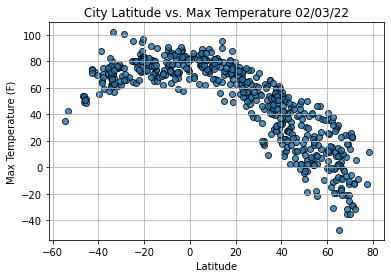

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

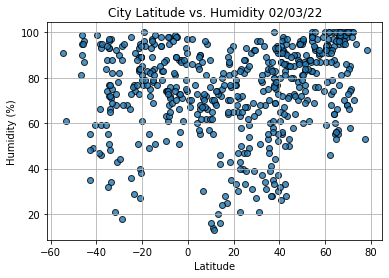

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

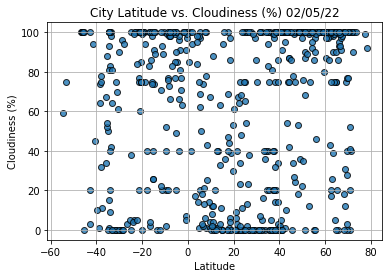

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

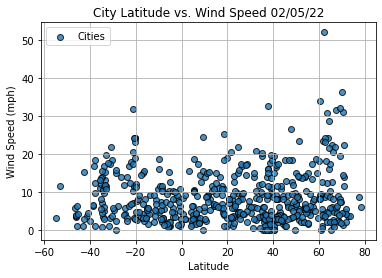

In [67]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.legend()
plt.show()


In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[[13]]
index13

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
13,La Ronge,CA,2022-02-04 05:14:57,55.1001,-105.2842,-18.15,69,0,4.61


In [32]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
544     True
545    False
546     True
547     True
548     True
Name: Lat, Length: 549, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kadoshkino,RU,2022-02-04 05:14:53,54.0257,44.4191,23.43,96,100,14.00
1,Hasaki,JP,2022-02-04 05:13:29,35.7333,140.8333,45.00,60,100,6.08
3,Pangody,RU,2022-02-04 05:14:54,65.8500,74.4859,4.19,98,93,6.13
5,Bayanday,RU,2022-02-04 05:14:55,53.0661,105.5139,6.28,88,99,5.55
7,Ponta Do Sol,PT,2022-02-04 05:14:55,32.6667,-17.1000,63.12,74,16,2.71


In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

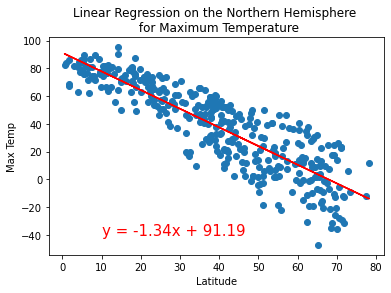

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-40))

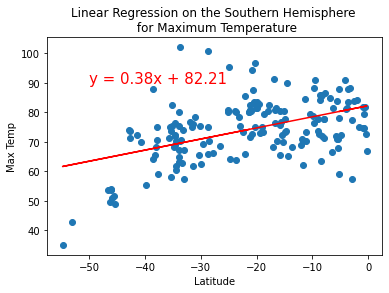

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


In [66]:
from scipy import stats
r_value = stats.linregress(x_values, y_values)
r_value

LinregressResult(slope=0.3884341340208625, intercept=58.778164330461884, rvalue=0.3798994006244651, pvalue=2.5424162763376608e-14, stderr=0.04897214776798337, intercept_stderr=2.164280802612435)

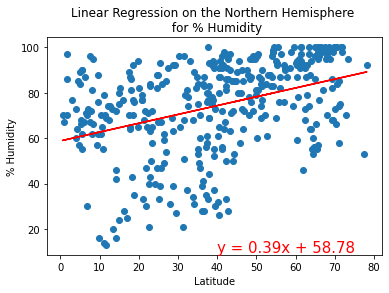

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

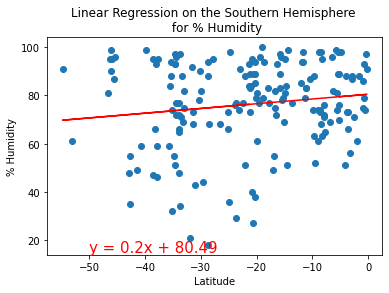

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

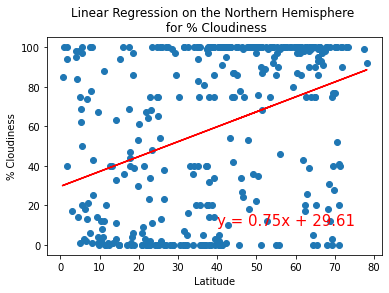

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

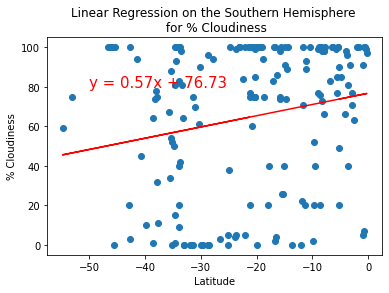

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,80))

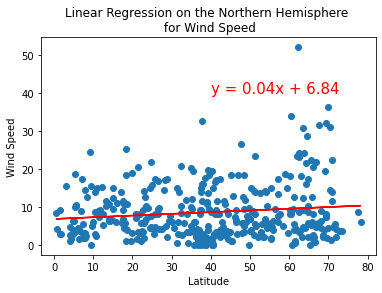

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,40))

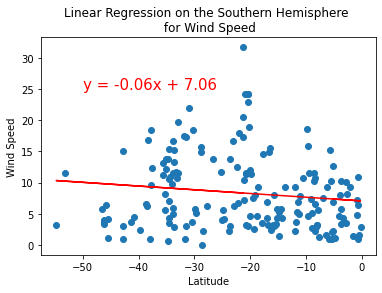

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))